In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

####Age: age of the patient [years]
Sex: sex of the patient [M: Male, F: Female]
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
RestingBP: resting blood pressure [mm Hg]
Cholesterol: serum cholesterol [mm/dl]
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
Oldpeak: oldpeak = ST [Numeric value measured in depression]
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
HeartDisease: output class [1: heart disease, 0: Normal]

In [2]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/heart.csv

--2022-04-14 07:16:13--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/heart.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.143.10
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.143.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11328 (11K) [text/csv]
Saving to: ‘heart.csv’

heart.csv           100%[===================>]  11.06K  --.-KB/s    in 0s      

2022-04-14 07:16:13 (133 MB/s) - ‘heart.csv’ saved [11328/11328]



In [3]:
df = pd.read_csv('heart.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


0

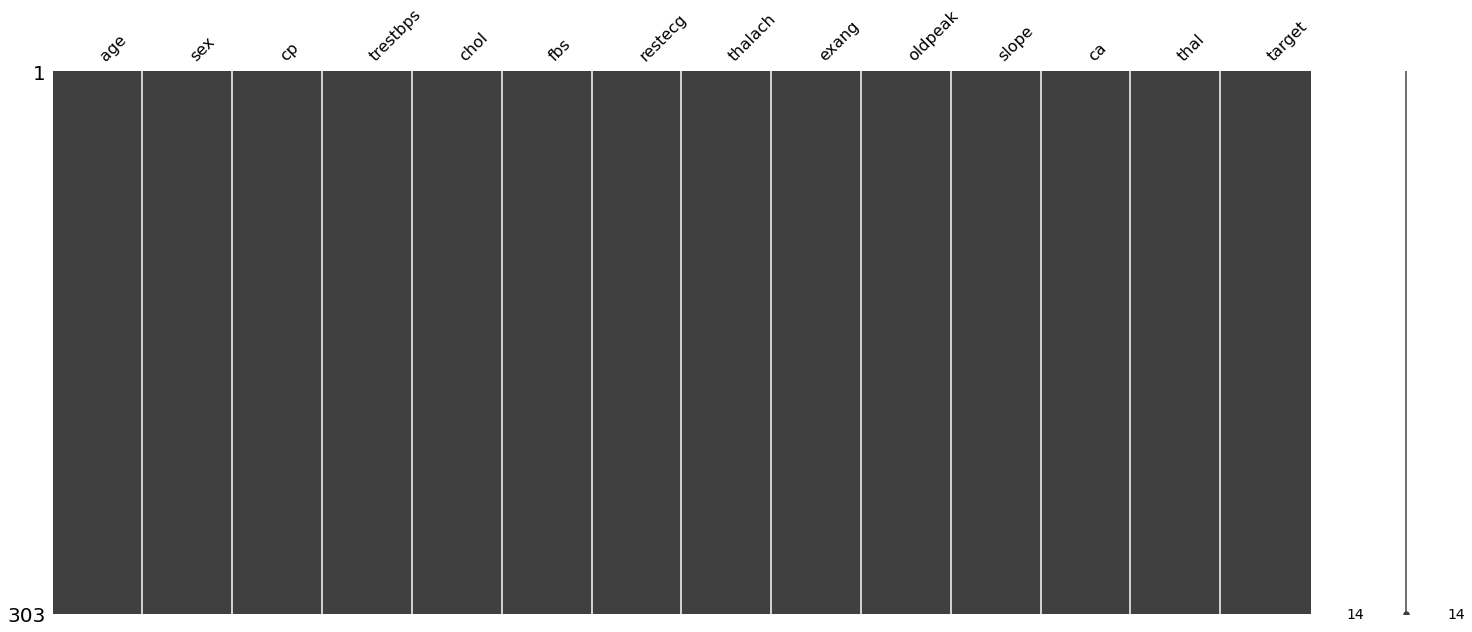

In [8]:
import missingno as msno   # creo il grafico nero con la distribuzione dei valori nulli
msno.matrix(df)
df.isnull().sum().sum()

In [10]:
df['target'].value_counts() 

1    165
0    138
Name: target, dtype: int64

In [11]:
# controllo il bilanciamento
from collections import Counter
target = df["target"]
counter = Counter(target)
for k,v in counter.items():
  per = v/len(target)*100
  print("Class=%d, Count=%d, Percentage=%.3f%%" % (k,v, per))

Class=1, Count=165, Percentage=54.455%
Class=0, Count=138, Percentage=45.545%


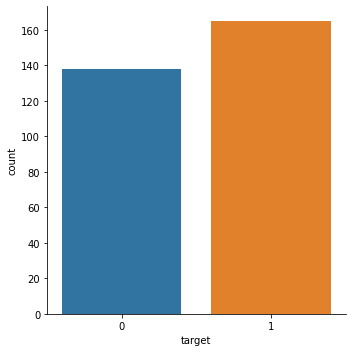

In [12]:
# controllo i valori del target
import seaborn as sns
# number of values for each quality
sns.catplot(x='target', data = df, kind = 'count')

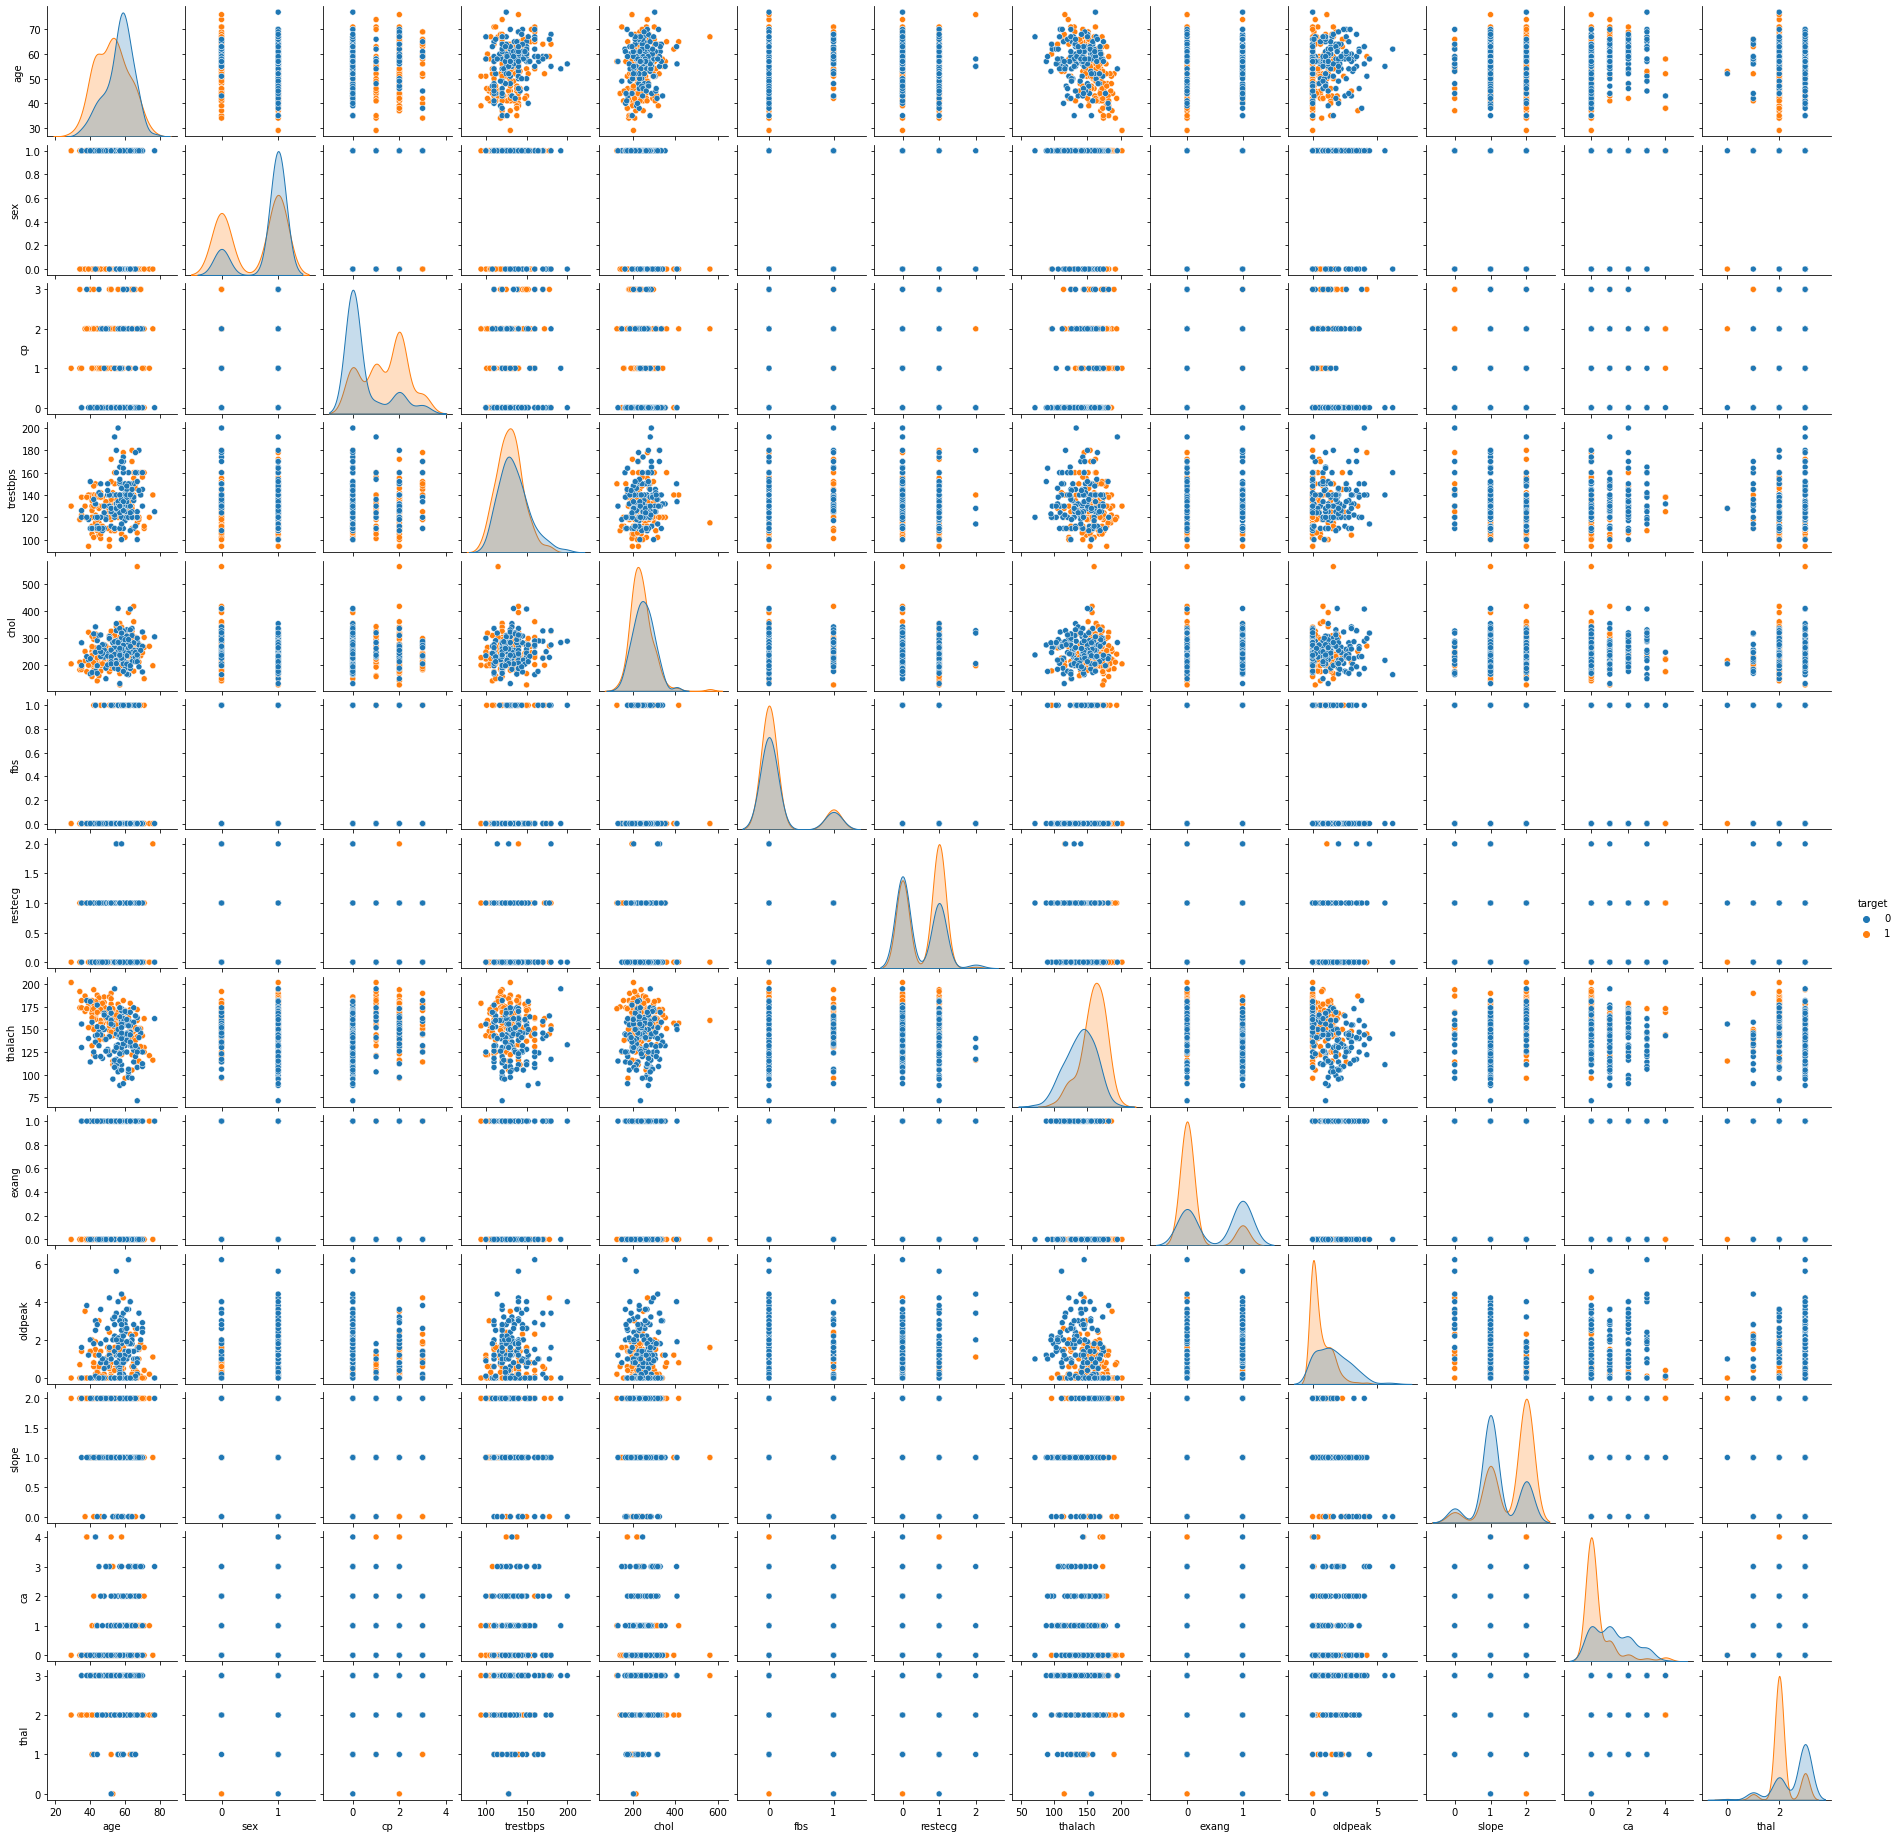

In [15]:
sns.pairplot(df, hue='target', height=2, aspect=1)

In [16]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


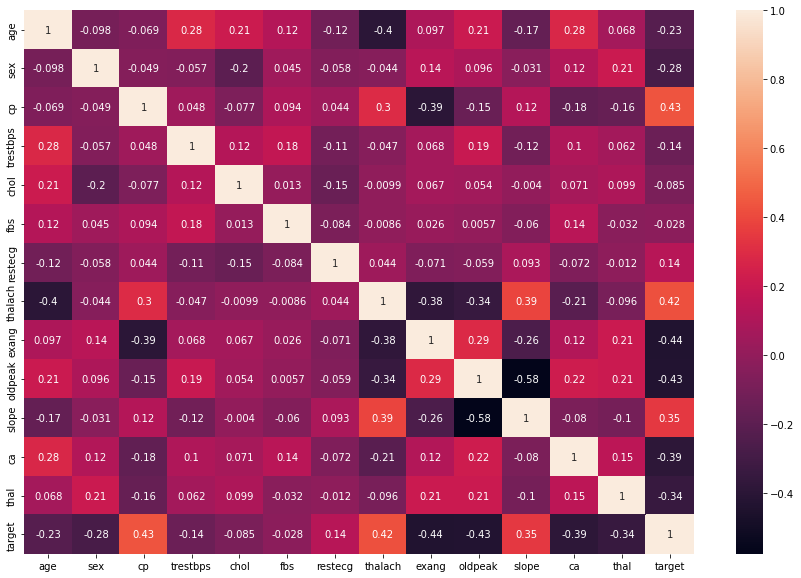

In [18]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True);

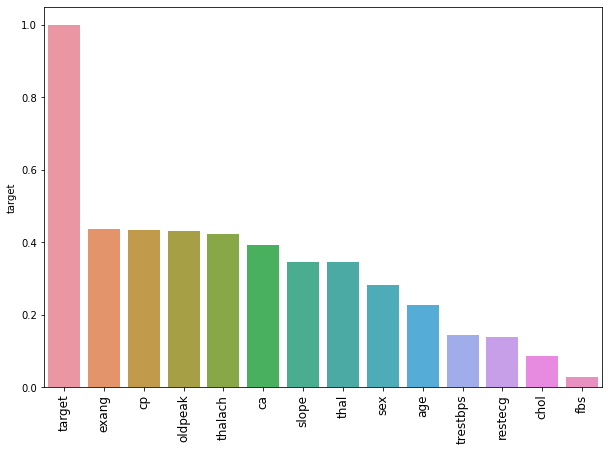

In [20]:
# grafico di correlazione delle Features bar plot
price_corr = df.corr() ["target"].abs().sort_values(ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(x=price_corr.index, y=price_corr)
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [21]:
# Definisco le Features e il Target 
X = df.drop(['target'], axis=1)
y = df['target']

In [31]:
sc = StandardScaler()
standardized_data = sc.fit_transform(X)
X_ = standardized_data

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_,y,
                                                    test_size = 0.2,
                                                    random_state=667
                                                    )

In [33]:
# Visualizzo la shape del train e test
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


>1, train: 0.831, test: 0.836
>2, train: 0.860, test: 0.852
>3, train: 0.888, test: 0.803
>4, train: 0.926, test: 0.836
>5, train: 0.959, test: 0.803
>6, train: 0.983, test: 0.820
>7, train: 1.000, test: 0.803
>8, train: 1.000, test: 0.803
>9, train: 1.000, test: 0.803
>10, train: 1.000, test: 0.803
>11, train: 1.000, test: 0.803
>12, train: 1.000, test: 0.803
>13, train: 1.000, test: 0.803
>14, train: 1.000, test: 0.803
>15, train: 1.000, test: 0.803
>16, train: 1.000, test: 0.803
>17, train: 1.000, test: 0.803
>18, train: 1.000, test: 0.803
>19, train: 1.000, test: 0.803
>20, train: 1.000, test: 0.803


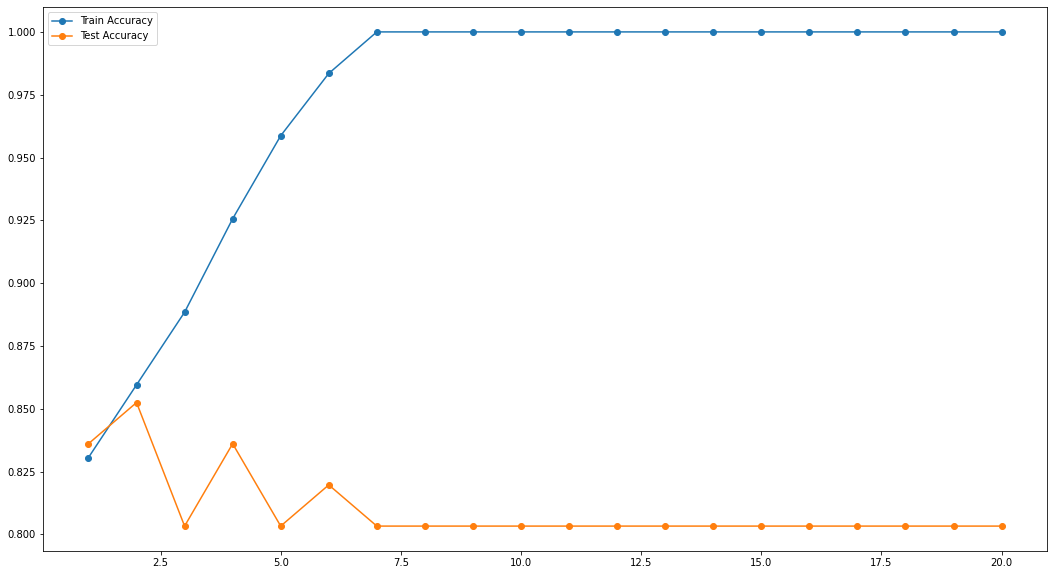

In [34]:
from sklearn.ensemble import RandomForestClassifier

train_scores, test_scores = [],[]
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_y_pred = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_y_pred)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_y_pred = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_y_pred)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth

plt.figure(figsize=(18,10))
plt.plot(values, train_scores, '-o', label='Train Accuracy')
plt.plot(values, test_scores, '-o', label='Test Accuracy')
plt.legend()

In [ ]:
#  best fit depth=2, train: 0.860, test: 0.852

In [35]:
classifier = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=2)

In [36]:
#training the classifier
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=667)

Text(0.5, 0, 'Relative Importance')

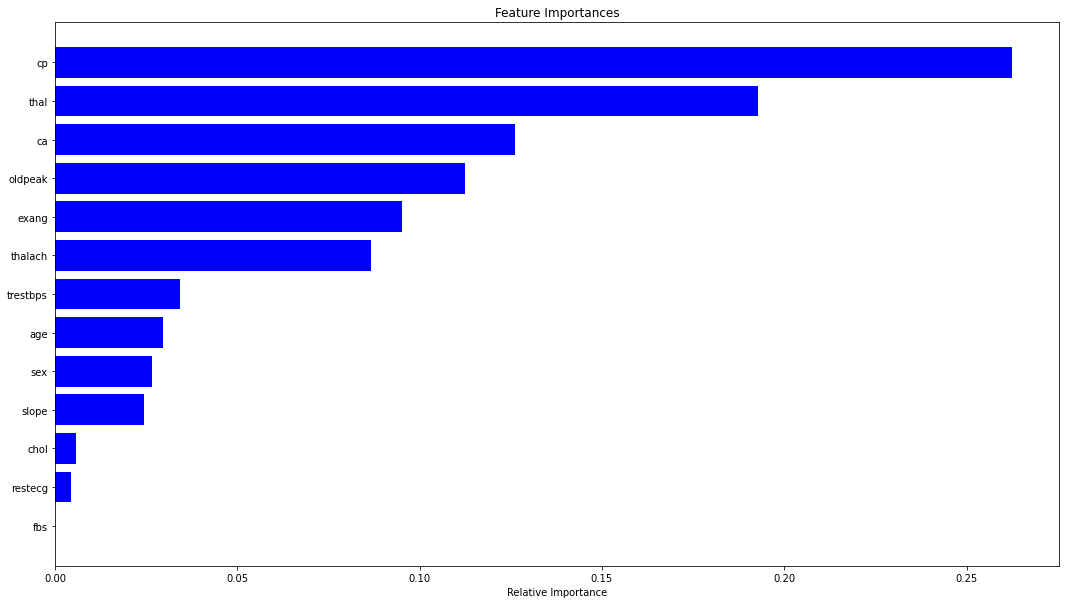

In [37]:
#Feature importance for Random Forest
features = X.columns
importances = classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(18,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=2)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.639344262295082

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=2)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.8524590163934426

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_clf.score(X_test, y_test)

0.7868852459016393

In [41]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test, y_test)

0.8032786885245902

In [42]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train,y_train)
nb_clf.score(X_test, y_test)

0.8360655737704918

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X_train,y_train)
knn_clf.score(X_test, y_test)

0.7868852459016393

In [44]:
from sklearn.svm import SVC
svm_clf = SVC(probability=True)
svm_clf.fit(X_train,y_train)
svm_clf.score(X_test, y_test)

0.819672131147541

In [45]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train,y_train)
xgb_clf.score(X_test, y_test)

0.7540983606557377

In [49]:
labels = ['Normal', 'HeartDisease']

In [50]:
classifiers = [DecisionTreeClassifier(max_depth=2), 
               RandomForestClassifier(random_state=667, n_estimators=100,max_depth=2),
               GradientBoostingClassifier(n_estimators=100),
               LogisticRegression(max_iter=1000),
               GaussianNB(),
               KNeighborsClassifier(n_neighbors=2),
               SVC(probability=True),
               XGBClassifier()
               ]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=667)

for cls in classifiers:
    cls.fit(X_train, y_train)
    cls.predict(X_test)

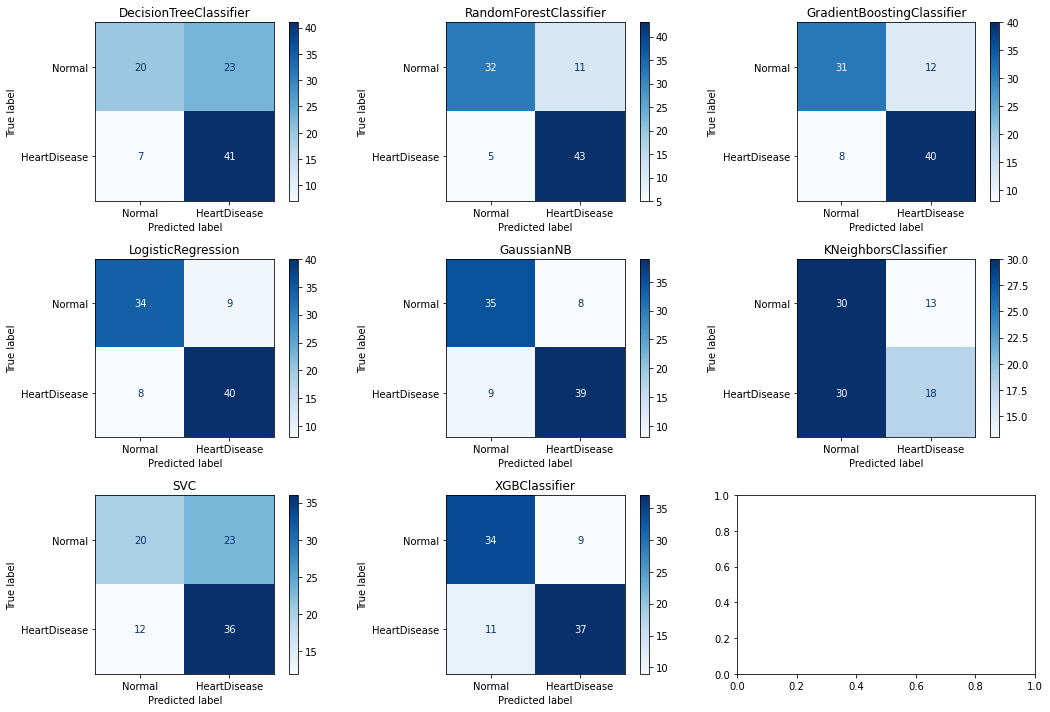

In [53]:
from sklearn.metrics import plot_confusion_matrix

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                         display_labels=labels)
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
#plt.show()

In [54]:
from sklearn.metrics import classification_report
for cls, ax in zip(classifiers, axes.flatten()):
    print(cls)
    print(classification_report(y_test,cls.predict(X_test)))

DecisionTreeClassifier(max_depth=2)
              precision    recall  f1-score   support

           0       0.74      0.47      0.57        43
           1       0.64      0.85      0.73        48

    accuracy                           0.67        91
   macro avg       0.69      0.66      0.65        91
weighted avg       0.69      0.67      0.66        91

RandomForestClassifier(max_depth=2, random_state=667)
              precision    recall  f1-score   support

           0       0.86      0.74      0.80        43
           1       0.80      0.90      0.84        48

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91

GradientBoostingClassifier()
              precision    recall  f1-score   support

           0       0.79      0.72      0.76        43
           1       0.77      0.83      0.80        48

    accuracy                           0.78        91
   macro 

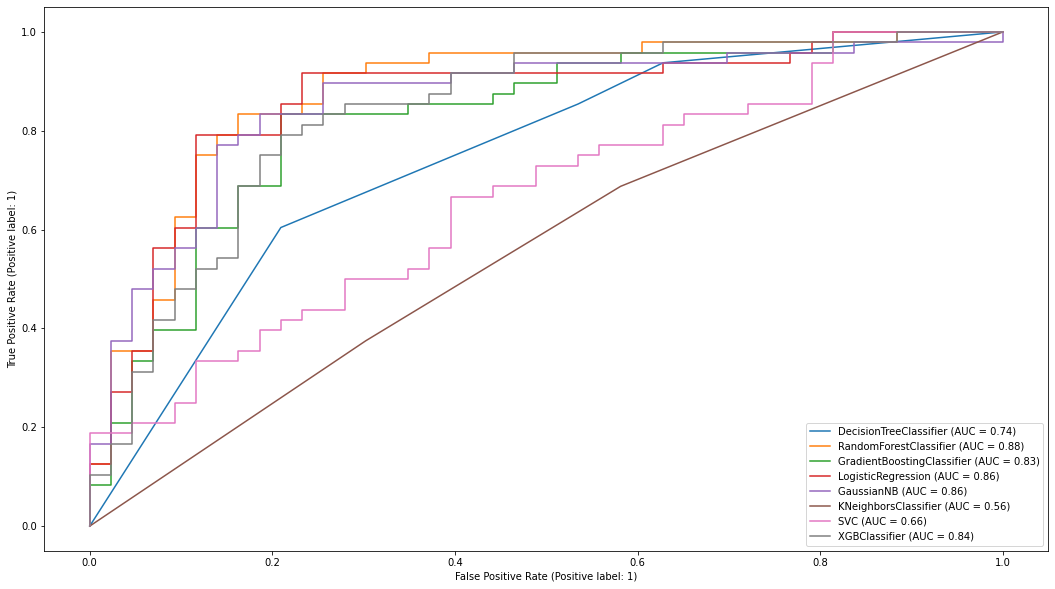

In [55]:
from sklearn.metrics import plot_roc_curve

plt.figure(figsize=(18,10))
ax = plt.gca()

for cls in classifiers:
    cls.fit(X_train, y_train)
    plot_roc_curve(cls, X_test, y_test, ax=ax)

In [58]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score

featu=[]
for i in range(2,len(X.columns)):
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
    classifier = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=2)
    pipe = Pipeline([
                    ('scaler', StandardScaler()),
                    ('featureselection',rfe),
                    ('classifier',classifier)
                    ])
    pipe.fit(X_train,y_train)
    test_y_pred = pipe.predict(X_test)
    test_acc = accuracy_score(y_test, test_y_pred)
    y_pred_proba = pipe.predict_proba(X_test)[::,1]
    roc_auc = roc_auc_score(y_test,y_pred_proba)
    featu.append(roc_auc)
    # summarize progress
    print('feature selected %d, Acc.Test: %.3f, AUC: %.3f' % (i, test_acc, roc_auc ))

print('\n Best number of feature selection is: %d' % (np.argmax(featu) +2))

feature selected 2, Acc.Test: 0.714, AUC: 0.762
feature selected 3, Acc.Test: 0.725, AUC: 0.785
feature selected 4, Acc.Test: 0.747, AUC: 0.821
feature selected 5, Acc.Test: 0.802, AUC: 0.860
feature selected 6, Acc.Test: 0.824, AUC: 0.853
feature selected 7, Acc.Test: 0.813, AUC: 0.862
feature selected 8, Acc.Test: 0.813, AUC: 0.871
feature selected 9, Acc.Test: 0.802, AUC: 0.850
feature selected 10, Acc.Test: 0.824, AUC: 0.878
feature selected 11, Acc.Test: 0.824, AUC: 0.881
feature selected 12, Acc.Test: 0.824, AUC: 0.869

 Best number of feature selection is: 11


In [59]:
# X = features not standardized
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state=667
                                                    )

In [60]:
standardize = StandardScaler()
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=11)
classifier = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=2)

pipe = Pipeline([
                ('scaler', standardize),
                ('featureselection',rfe),
                ('classifier',classifier)
                ])
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('featureselection',
                 RFE(estimator=DecisionTreeClassifier(),
                     n_features_to_select=11)),
                ('classifier',
                 RandomForestClassifier(max_depth=2, random_state=667))])

In [66]:
input_data = [50,	1,	3,	145,	233,	1	,0,	150,	2.3,0,	0,	1	,1]

prediction = pipe.predict([input_data])
print(prediction[0])

if (prediction[0] == 0):
  print('Normal')
else:
  print('HeartDisease')

1
HeartDisease


In [ ]:
import joblib
joblib.dump(pipe,'pipe_loan.pkl')